## Generating training and testing datasets (MNIST)

In [80]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

path = 'mnist.pkl.gz'
f = gzip.open(path, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

x_train, y_train = training_data[0], training_data[1]
print (x_train.shape, y_train.shape)

x_test, y_test = test_data[0], test_data[1]
print (x_test.shape, y_test.shape)

x_traindnn = x_train
y_traindnn = y_train

x_testdnn = x_test
y_testdnn = y_test

# print(x_traindnn.shape)
# print(y_traindnn.shape)


(50000, 784) (50000,)
(10000, 784) (10000,)


## Classification using a CNN

In [81]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape (50000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)


Epoch 1/10
50000/50000 [==============================] - 14s 275us/step - loss: 0.2469 - acc: 0.9248
Epoch 2/10
50000/50000 [==============================] - 12s 245us/step - loss: 0.1055 - acc: 0.9678
Epoch 3/10
50000/50000 [==============================] - 12s 241us/step - loss: 0.0719 - acc: 0.9776
Epoch 4/10
50000/50000 [==============================] - 13s 261us/step - loss: 0.0550 - acc: 0.9820
Epoch 5/10
50000/50000 [==============================] - 12s 239us/step - loss: 0.0427 - acc: 0.9856
Epoch 6/10
50000/50000 [==============================] - 12s 243us/step - loss: 0.0368 - acc: 0.9878
Epoch 7/10
50000/50000 [==============================] - 12s 241us/step - loss: 0.0292 - acc: 0.9901
Epoch 8/10
50000/50000 [==============================] - 12s 235us/step - loss: 0.0276 - acc: 0.9907
Epoch 9/10
50000/50000 [==============================] - 12s 238us/step - loss: 0.0234 - acc: 0.9922
Epoch 10/10
50000/50000 [==============================] - 12s 237us/step - loss: 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1147c6f60>,
      dtype=object)

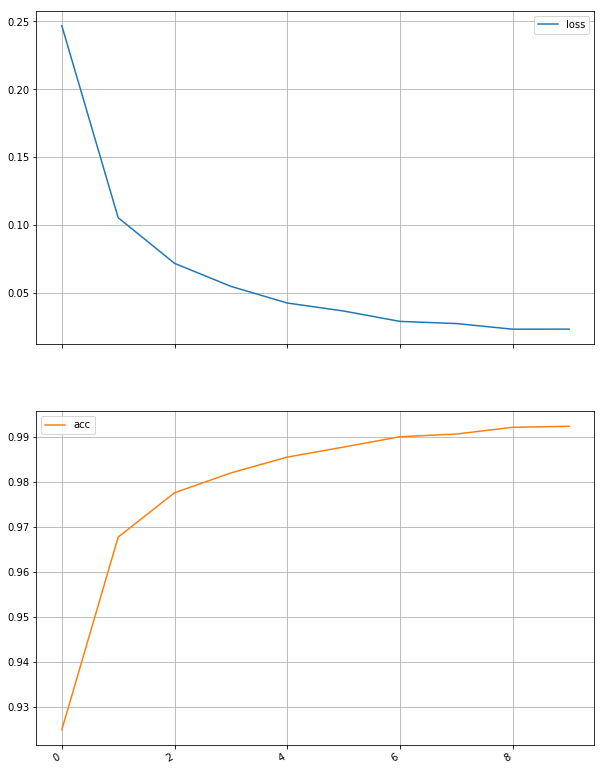

In [106]:
# Building the model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline
import pandas as pd

#creating a CNN
input_shape = (28, 28, 1)   
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
y_predicted = model.add(Dense(10,activation=tf.nn.softmax))

#Compiling the CNN
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

#plot graphs
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))


## Testing the CNN model using MNIST and USPS datasets

In [108]:
#Testing using MNIST dataset

print(x_test.shape)
print(y_test.shape)
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred1 = np.empty((10000,0))
for i in range(10000):
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    pred = pred.argmax()
    pred1 = np.append(pred1, pred)

np.savetxt("cnn.csv", pred1, delimiter=",")
np.savetxt("actual.csv", pred1, delimiter=",")
confusion = tf.confusion_matrix(labels=y_test, predictions=pred1)

with tf.Session():
   print('Confusion Matrix: \n', tf.Tensor.eval(confusion,feed_dict=None, session=None))
 

(10000, 28, 28, 1)
(10000,)
10000/10000 [==============================] - 1s 86us/step
Test loss: 0.0560671895022675
Test accuracy: 0.9852
Confusion Matrix: 
 [[ 960    0    2    0    0    1   12    1    2    2]
 [   0 1126    4    0    0    0    2    3    0    0]
 [   0    0 1021    0    0    0    2    7    2    0]
 [   0    0    0  999    0    5    0    3    3    0]
 [   0    1    4    0  965    0    2    0    1    9]
 [   1    0    1    5    0  881    2    1    1    0]
 [   3    2    0    0    1    2  949    0    1    0]
 [   0    1    7    0    0    0    0 1018    0    2]
 [   2    0    3    5    1    5    0    4  950    4]
 [   1    3    0    6    5    6    1    4    0  983]]


In [109]:
#Testing using USPS dataset

from PIL import Image
import os
import numpy as np

#USPS data preprocessing
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []


for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
usps_data = np.array(USPSMat) 
usps_lables = np.array(USPSTar)
usps_data = usps_data.reshape(usps_data.shape[0], 28, 28, 1)


#Testing using USPS data

score = model.evaluate(usps_data, usps_lables)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred1 = np.empty((19999,0))
for i in range(19999):
    pred = model.predict(usps_data[i].reshape(1, 28, 28, 1))
    pred = pred.argmax()
    pred1 = np.append(pred1, pred)
np.savetxt("cnn_usps.csv", pred1, delimiter=",")

confusion = tf.confusion_matrix(labels=usps_lables, predictions=pred1)

with tf.Session():
   print('Confusion Matrix: \n', tf.Tensor.eval(confusion,feed_dict=None, session=None))
 

19999/19999 [==============================] - 2s 87us/step
Test loss: 4.800172557170179
Test accuracy: 0.4875743787099948
Confusion Matrix: 
 [[ 387    1  253   55  226   45  173   23   47  790]
 [  36  467  184   56  541   89   77  300  190   60]
 [   5    6 1737   34   22   77   42   32   37    7]
 [   0    2  148 1175    5  552   14   36   51   17]
 [   1   13  123   59 1101   28    9  195  428   43]
 [   3    1   52  210    7 1636    6   17   24   44]
 [  20    6  458   17   60  154 1243    3   25   14]
 [   3   19  275  524   21   45   24  926  139   24]
 [  15    2  131  528   16  375   27   64  664  178]
 [   2    0  162  616   59   20    6  216  504  415]]


## Using the CNN model to predict lables of images

actual value: 7
predicted value: 7


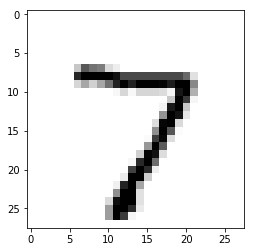

In [100]:
image_index = 4444
#print(x_test[0])
plt.imshow(x_test[0].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[0].reshape(1, 28, 28, 1))
print("actual value:",y_test[0])
print("predicted value:",pred.argmax())
np.savetxt("actual_usps.csv", usps_lables, delimiter=",")

## Classification using DNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
activation_15 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                20490     
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
50000/50000 [==============================] - 17s 334us/step - loss: 0.2106 - acc: 0.9361
Epoch 2/10
50000/50000 [======

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112128898>,
      dtype=object)

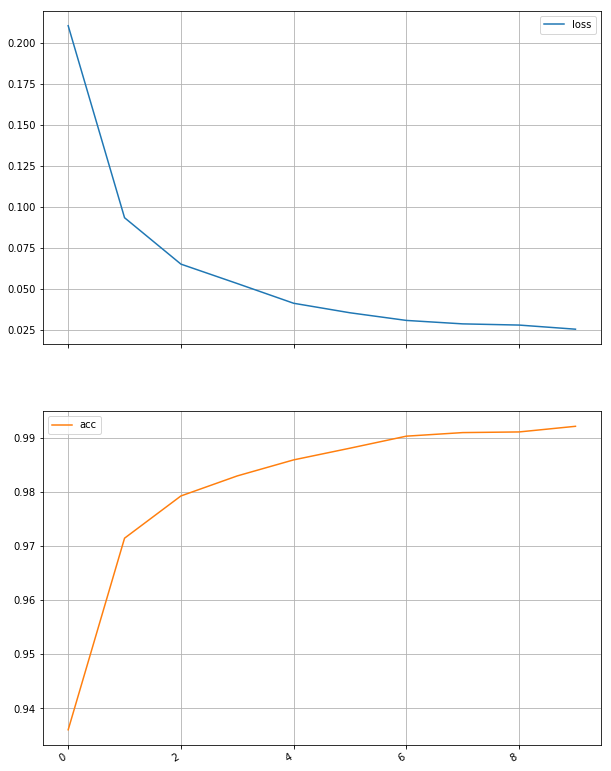

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import numpy as np
from keras.utils import to_categorical


input_size = 784
drop_out = 0.2
first_dense_layer_nodes  = 2048
second_dense_layer_nodes = 10

def get_model():
    model = Sequential()
  
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out)) 
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_dnn = get_model()
history = model_dnn.fit(x=x_traindnn,y=to_categorical(y_traindnn), epochs=10)

#plot graphs
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))


## Testing the DNN model using MNIST and USPS datasets

In [103]:
#Testing using MNIST dataset


score = model_dnn.evaluate(x_testdnn, to_categorical(y_testdnn))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_dnn = np.empty((10000,0))
for i in range(10000):
    pred = model_dnn.predict(x_testdnn[i].reshape(1, 784))
    for i in range(pred.shape[0]):
        datum = pred[i]
        preddec = np.argmax(pred[i])
    pred_dnn = np.append(pred_dnn, preddec)

np.savetxt("dnn.csv", pred_dnn, delimiter=",")

confusion = tf.confusion_matrix(labels=y_test, predictions=pred_dnn)
with tf.Session():
   print('Confusion Matrix: \n', tf.Tensor.eval(confusion,feed_dict=None, session=None))
 

10000/10000 [==============================] - 1s 88us/step
Test loss: 0.09019882881085704
Test accuracy: 0.98
Confusion Matrix: 
 [[ 974    1    0    0    1    0    0    1    1    2]
 [   0 1130    2    1    0    0    0    0    2    0]
 [   5    2  999    3    1    0    1    8   13    0]
 [   1    0    6  994    0    2    0    3    2    2]
 [   1    1    4    0  963    0    1    2    3    7]
 [   4    0    0   17    1  863    3    0    3    1]
 [   7    4    0    1    4    6  933    0    3    0]
 [   1    2    5    3    1    0    0 1008    2    6]
 [   5    0    2    3    4    2    1    2  950    5]
 [   3    3    0    4    8    1    0    3    1  986]]


In [105]:
#Testing using USPS dataset

from PIL import Image
import os
import numpy as np

#USPS data preprocessing
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []


for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
usps_data = np.array(USPSMat) 
usps_lables = np.array(USPSTar)

#Testing using USPS data

score = model_dnn.evaluate(usps_data, to_categorical(usps_lables))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_dnn = np.empty((19999,0))
for i in range(19999):
    pred = model_dnn.predict(usps_data[i].reshape(1, 784))
    for i in range(pred.shape[0]):
        datum = pred[i]
        preddec = np.argmax(pred[i])
    pred_dnn = np.append(pred_dnn, preddec)
np.savetxt("dnn_usps.csv", pred_dnn, delimiter=",")

confusion = tf.confusion_matrix(labels=usps_lables, predictions=pred_dnn)
with tf.Session():
   print('Confusion Matrix: \n', tf.Tensor.eval(confusion,feed_dict=None, session=None))

19999/19999 [==============================] - 1s 68us/step
Test loss: 5.157580578849938
Test accuracy: 0.4952747637292458
Confusion Matrix: 
 [[ 702    3  182   35  270  125  153   91  113  326]
 [  43  566  393   92  311   63    7  366  107   52]
 [  73   10 1648   30   20   66   55   47   43    7]
 [  34    9  198 1454    8  194    6   18   66   13]
 [  22   75   48   13 1222   95   29  223  241   32]
 [  68    1  173   57   18 1465   51   18  143    6]
 [ 196   19  420   17   49  115 1015   68   33   68]
 [  29  144  312  309   55   23   22  874  221   11]
 [ 190   14  175  292  134  227  116  110  710   32]
 [   9   66  109  197  269   30    6  670  395  249]]


## Using the DNN model to predict labels of images

actual value: 6
predicted value: 6


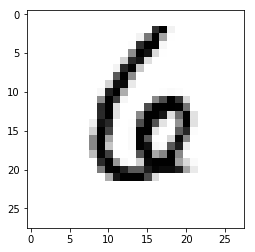

In [90]:
image_index = 4444
#print(x_test[123])
plt.imshow(x_test[123].reshape(28, 28),cmap='Greys')
pred = model_dnn.predict(x_testdnn[123].reshape(1, 784))
print("actual value:",y_testdnn[123])
print("predicted value:",pred.argmax())
